In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from src import (
    load_train_test_split,
    create_mlp_model, compile_model, train_model, save_model, get_model_summary,
    MODEL_CONFIG, TRAIN_CONFIG
)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Load Preprocessed Data

In [6]:
# Load the train/test splits
splits = load_train_test_split()

X_train = splits['X_train']
X_test = splits['X_test']
y_train = splits['y_train']
y_test = splits['y_test']

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nFeature names: {list(X_train.columns)}")

Loaded train/test splits from ./data/processed/penguins_train_test.pkl
Training set: 266 samples, 7 features
Test set: 67 samples

Feature names: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE']


In [7]:
print("Model configuration:")
print(MODEL_CONFIG)

Model configuration:
{'hidden_units': 32, 'activation': 'relu', 'output_activation': 'softmax', 'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'metrics': ['accuracy']}


In [8]:
# Create the model
model = create_mlp_model(input_shape=X_train.shape[1])

# Compile the model
model = compile_model(model)

# Display model summary
get_model_summary(model)

Created MLP model:
  Input shape: 7
  Hidden layer: 32 units, relu activation
  Output layer: 3 units, softmax activation

Compiled model:
  Optimizer: adam
  Loss: sparse_categorical_crossentropy
  Metrics: ['accuracy']


W0000 00:00:1767793513.464870  502911 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
print("Training configuration:")
print(TRAIN_CONFIG)

Training configuration:
{'test_size': 0.2, 'validation_split': 0.2, 'epochs': 10, 'batch_size': 32, 'random_state': 42, 'verbose': 0}


In [11]:
# Train the model
model, history = train_model(
    X_train, y_train,
    model=model,
    verbose=1  # Show training progress
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4340 - loss: 1.4109 - val_accuracy: 0.4815 - val_loss: 1.3686
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 1.2862 - val_accuracy: 0.5370 - val_loss: 1.2434
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5283 - loss: 1.1703 - val_accuracy: 0.5556 - val_loss: 1.1270
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5472 - loss: 1.0632 - val_accuracy: 0.5556 - val_loss: 1.0198
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5519 - loss: 0.9651 - val_accuracy: 0.5556 - val_loss: 0.9213
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5566 - loss: 0.8753 - val_accuracy: 0.5926 - val_loss: 0.8320
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6274 - loss: 0.7934 - val_accuracy: 0.7037 - val_loss: 0.7521
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6840 - loss: 0.7192 - val_accuracy: 0.7593 - val_loss: 0.6808


## Training History Visualization

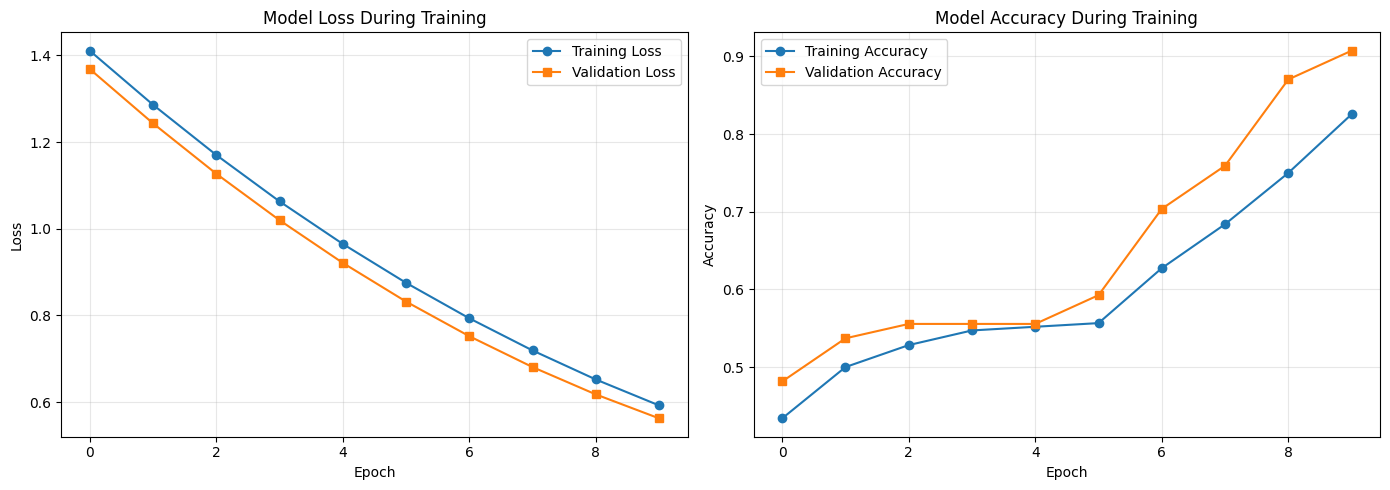

In [12]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Training Loss', marker='o')
axes[0].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Loss During Training')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Accuracy During Training')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Save the Trained Model

In [13]:
save_model(model)

Model saved to ./models/penguin_classifier.keras
